import the required packages 

In [8]:
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
import cv2

In [9]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [10]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [11]:
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [12]:
#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array
nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))

In [13]:
#so,eventually,model.predict() should also be a 2d input
nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))

Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
model=RandomForestClassifier()

In [16]:
model.fit(x_train2,y_train)

c:\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [17]:
y_pred=model.predict(x_test2)
y_pred

array([6, 8, 8, ..., 3, 5, 7], dtype=uint8)

In [18]:
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.56      0.54      0.55      1032
           1       0.55      0.52      0.54      1057
           2       0.31      0.36      0.34       868
           3       0.27      0.34      0.30       808
           4       0.40      0.40      0.40       991
           5       0.39      0.42      0.40       921
           6       0.56      0.46      0.50      1232
           7       0.47      0.54      0.50       869
           8       0.61      0.57      0.59      1075
           9       0.54      0.47      0.51      1147

    accuracy                           0.47     10000
   macro avg       0.47      0.46      0.46     10000
weighted avg       0.48      0.47      0.47     10000



In [19]:
confusion_matrix(y_pred,y_test)

array([[555,  33, 107,  55,  55,  29,  11,  54,  89,  44],
       [ 34, 554,  45,  38,  21,  30,  31,  42,  90, 172],
       [ 62,  16, 314,  76, 148,  89,  91,  41,  18,  13],
       [ 14,  27,  86, 273,  58, 171,  66,  54,  29,  30],
       [ 36,  21, 139,  76, 400,  76, 107, 101,  20,  15],
       [ 21,  35,  59, 181,  46, 387,  58,  79,  33,  22],
       [ 28,  35, 131, 145, 152,  80, 563,  51,  13,  34],
       [ 22,  29,  59,  60,  70,  82,  22, 465,  22,  38],
       [169,  62,  28,  27,  30,  28,  10,  20, 613,  88],
       [ 59, 188,  32,  69,  20,  28,  41,  93,  73, 544]], dtype=int64)

the Random Forest Classifier shows only 46% accuracy on the test set.

KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn=KNeighborsClassifier(n_neighbors=7)

In [22]:
knn.fit(x_train2,y_train)

c:\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [23]:
y_pred_knn=knn.predict(x_test2)
y_pred_knn

array([2, 8, 8, ..., 5, 6, 4], dtype=uint8)

In [24]:
accuracy_score(y_pred_knn,y_test)
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.52      0.40      0.45      1299
           1       0.20      0.70      0.30       280
           2       0.44      0.22      0.29      2013
           3       0.20      0.28      0.23       707
           4       0.52      0.23      0.32      2222
           5       0.20      0.40      0.27       504
           6       0.27      0.35      0.30       761
           7       0.20      0.70      0.31       281
           8       0.69      0.39      0.50      1749
           9       0.14      0.73      0.23       184

    accuracy                           0.34     10000
   macro avg       0.34      0.44      0.32     10000
weighted avg       0.45      0.34      0.35     10000



In [25]:
confusion_matrix(y_pred_knn,y_test)

array([[518, 118, 110,  66,  60,  63,  22,  78, 112, 152],
       [  7, 195,   2,   5,   0,   2,   1,   8,  10,  50],
       [118, 124, 437, 243, 268, 225, 271, 185,  47,  95],
       [ 12,  51,  50, 199,  33, 156,  56,  57,  34,  59],
       [ 46, 173, 250, 214, 521, 201, 319, 294,  69, 135],
       [  5,  32,  24, 102,  14, 204,  32,  60,  12,  19],
       [ 30,  55,  65, 108,  44,  80, 265,  48,  14,  52],
       [  5,   8,   7,  11,  11,  10,   1, 196,   7,  25],
       [255, 223,  53,  51,  48,  53,  32,  68, 688, 278],
       [  4,  21,   2,   1,   1,   6,   1,   6,   7, 135]], dtype=int64)

 the KNN Classifier shows only 34% accuracy on the test set.

Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtc=DecisionTreeClassifier()

In [28]:
dtc.fit(x_train2,y_train)

DecisionTreeClassifier()

In [29]:
y_pred_dtc=dtc.predict(x_test2)
y_pred_dtc

array([7, 3, 1, ..., 2, 3, 1], dtype=uint8)

In [30]:
accuracy_score(y_pred_dtc,y_test)
print(classification_report(y_pred_dtc,y_test))

              precision    recall  f1-score   support

           0       0.36      0.34      0.35      1039
           1       0.28      0.29      0.28       969
           2       0.23      0.22      0.22      1061
           3       0.18      0.18      0.18      1009
           4       0.24      0.23      0.24      1043
           5       0.22      0.22      0.22       972
           6       0.28      0.29      0.28       960
           7       0.27      0.28      0.28       955
           8       0.38      0.37      0.38      1021
           9       0.28      0.29      0.28       971

    accuracy                           0.27     10000
   macro avg       0.27      0.27      0.27     10000
weighted avg       0.27      0.27      0.27     10000



In [31]:
confusion_matrix(y_pred_dtc,y_test)

array([[358,  74,  92,  67,  58,  60,  37,  65, 143,  85],
       [ 81, 278,  45,  63,  47,  53,  52,  75, 101, 174],
       [ 73,  65, 229, 113, 165, 101, 122,  79,  59,  55],
       [ 53,  79,  83, 184,  79, 162, 133, 114,  54,  68],
       [ 63,  70, 154, 105, 242,  87, 138,  97,  42,  45],
       [ 60,  49, 119, 137, 107, 217,  91,  93,  40,  59],
       [ 30,  53, 108, 131, 115, 106, 277,  56,  26,  58],
       [ 50,  58,  78,  95, 101, 100,  80, 272,  44,  77],
       [158, 110,  38,  45,  41,  57,  23,  69, 379, 101],
       [ 74, 164,  54,  60,  45,  57,  47,  80, 112, 278]], dtype=int64)

Naive Bayes Classifier

In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
nb=GaussianNB()

In [34]:
nb.fit(x_train2,y_train)

c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [35]:
y_pred_nb=nb.predict(x_test2)
y_pred_nb

array([6, 8, 8, ..., 6, 5, 4], dtype=uint8)

In [36]:
accuracy_score(y_pred_nb,y_test)
print(classification_report(y_pred_nb,y_test))

              precision    recall  f1-score   support

           0       0.49      0.27      0.35      1817
           1       0.17      0.41      0.24       405
           2       0.08      0.19      0.12       443
           3       0.08      0.25      0.12       305
           4       0.42      0.24      0.30      1737
           5       0.26      0.31      0.29       840
           6       0.47      0.25      0.33      1846
           7       0.13      0.42      0.20       310
           8       0.47      0.39      0.42      1219
           9       0.41      0.38      0.39      1078

    accuracy                           0.30     10000
   macro avg       0.30      0.31      0.28     10000
weighted avg       0.39      0.30      0.32     10000



In [37]:
confusion_matrix(y_pred_nb,y_test)

array([[494, 141, 225, 163,  86, 156, 106, 134, 168, 144],
       [ 20, 166,  24,  36,   8,  17,   2,  24,  41,  67],
       [ 39,  24,  83,  54,  57,  55,  60,  36,  18,  17],
       [ 10,  31,  15,  76,  26,  51,  18,  41,  17,  20],
       [ 84,  66, 292, 151, 417, 167, 228, 228,  56,  48],
       [ 34,  72,  48, 129,  38, 264,  46,  94,  83,  32],
       [ 50, 192, 209, 262, 265, 159, 467, 102,  39, 101],
       [  9,  19,  21,  26,  22,  36,  15, 131,   8,  23],
       [200, 121,  54,  34,  50,  57,  19,  72, 471, 141],
       [ 60, 168,  29,  69,  31,  38,  39, 138,  99, 407]], dtype=int64)

the Naive Bayes Classifier shows only 30% accuracy on the test set.

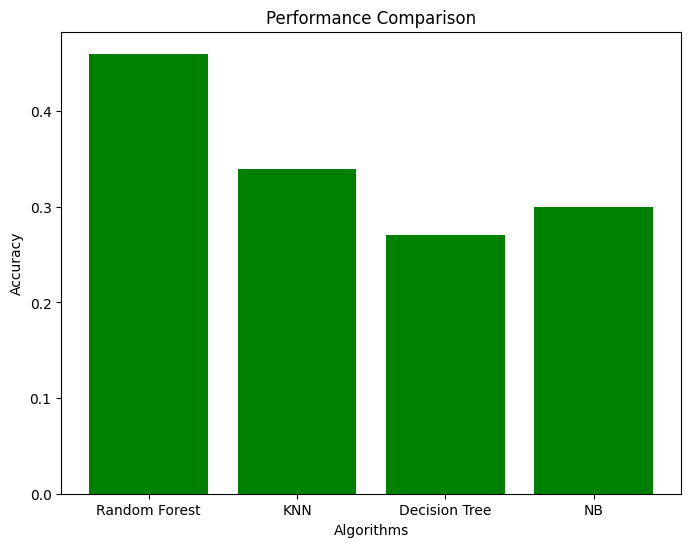

In [38]:
import matplotlib.pyplot as plt

# Data for the graph
algorithms = ['Random Forest', 'KNN', 'Decision Tree', 'NB']
accuracy = [ 0.46 , 0.34 ,0.27,0.30]  # Example accuracies

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(algorithms, accuracy, color='green')

# Add labels and title
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Performance Comparison')

# Display the graph
plt.show()

testing

In [50]:

img_path1='pic.jfif'


In [51]:
img_arr1=cv2.imread(img_path1)
img_arr=cv2.resize(img_arr1,(32,32))

In [52]:
#so,eventually,model.predict() should also be a 2d input
nx, ny, nrgb = img_arr.shape
img_arr2 = img_arr.reshape(1,(nx*ny*nrgb))

In [53]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [54]:
ans=model.predict(img_arr2)
print(classes[ans[0]])
#RandomForestClassifier

bird


image classification in machine learning by implementing four common ML algorithms, including Random Forest, KNN, Decision Tree, and Naive Bayes classifier. Due to their poor accuracy, deep learning is preferred for image classification tasks.